<a href="https://colab.research.google.com/github/Kraykray69/ML-Models-For-FordStayAlert/blob/main/FordStayAlert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Approach to the problem**
1. Load the data and libraries
2. Data Preparation and Data Transformation
3. Data Visualization
4. Data Analysis
   1. Uni Variate
   2. Bi- Variate
   3. Multi- Variate
      1. Classification
         1. Logistic Regression
         2. Decision Tree
         3. Random Forest
         4. Boosting
5. Evaluate the model
6. Apply the model to test data
7. Evaluate results using the submission data



















# Load libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!unzip '/content/stayalert (4).zip'

Archive:  /content/stayalert (4).zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


Import the data

In [ ]:
train = pd.read_csv('/content/fordTrain.csv')
test = pd.read_csv('/content/fordTest.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


# Exploratory Data Analysis

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


<Axes: xlabel='P1', ylabel='Density'>

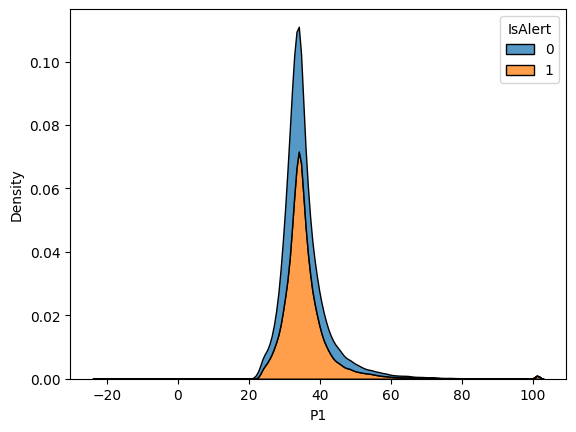

In [ ]:
sns.kdeplot(data=train, x="P1",hue="IsAlert",multiple="stack")

In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

In [ ]:
train.corr()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,...,0.065063,0.001900,-0.074320,0.123721,-0.097389,NaN,-0.047593,NaN,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,...,0.019009,0.007753,-0.000480,-0.006284,0.003935,NaN,0.008191,NaN,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,...,-0.050740,-0.062000,0.097022,0.055429,-0.244150,NaN,-0.165550,NaN,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,...,-0.021118,0.002551,0.021404,0.051348,-0.019792,NaN,-0.029747,NaN,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,...,0.001779,0.002272,-0.006038,-0.023902,0.010608,NaN,0.008257,NaN,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,...,0.008651,-0.006380,0.013045,0.001312,-0.010245,NaN,-0.007963,NaN,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,...,-0.006926,0.008049,-0.010905,0.001705,0.008348,NaN,0.005379,NaN,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,...,0.026232,0.005371,0.070290,-0.016671,-0.046353,NaN,-0.023359,NaN,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,...,-0.010418,-0.004996,0.019121,0.029222,-0.025728,NaN,-0.016850,NaN,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,...,0.025850,0.007986,0.037711,0.024499,-0.020696,NaN,-0.008450,NaN,-0.041814,0.019360


<Axes: >

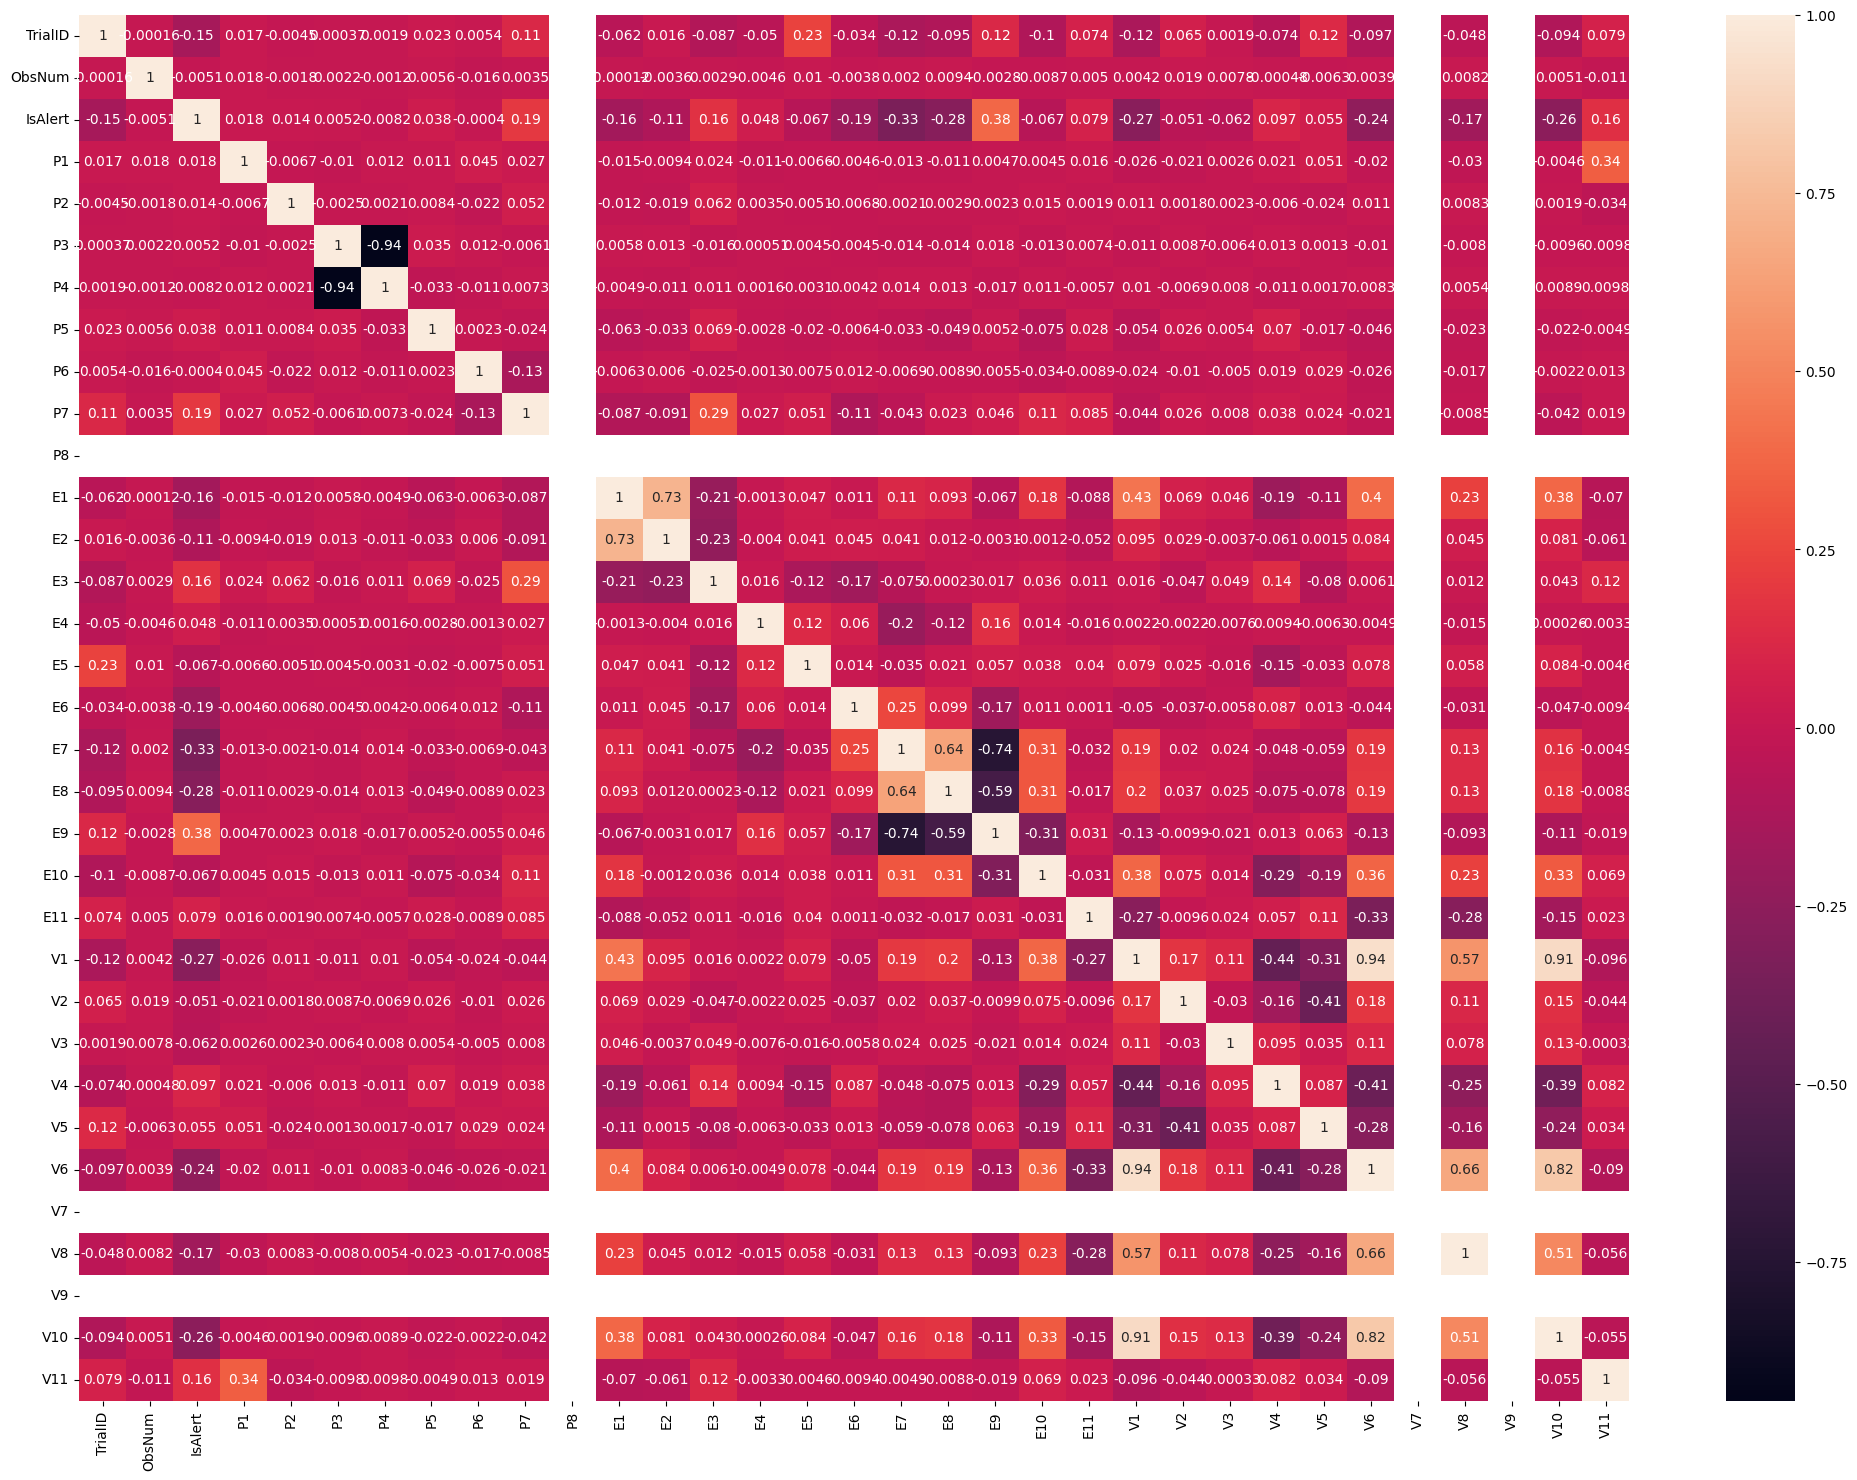

In [ ]:
plt.figure(figsize=(25,18))
sns.heatmap(train.corr(),annot=True)

# Data Preprocessing

In [ ]:
y = train['IsAlert']
x = train.iloc[:,3:]


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P1      604329 non-null  float64
 1   P2      604329 non-null  float64
 2   P3      604329 non-null  int64  
 3   P4      604329 non-null  float64
 4   P5      604329 non-null  float64
 5   P6      604329 non-null  int64  
 6   P7      604329 non-null  float64
 7   P8      604329 non-null  int64  
 8   E1      604329 non-null  float64
 9   E2      604329 non-null  float64
 10  E3      604329 non-null  int64  
 11  E4      604329 non-null  int64  
 12  E5      604329 non-null  float64
 13  E6      604329 non-null  int64  
 14  E7      604329 non-null  int64  
 15  E8      604329 non-null  int64  
 16  E9      604329 non-null  int64  
 17  E10     604329 non-null  int64  
 18  E11     604329 non-null  float64
 19  V1      604329 non-null  float64
 20  V2      604329 non-null  float64
 21  V3      60

# Splitting of Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


# Multi-Variate Model

In [ ]:
logreg = LogisticRegression(max_iter=1000)
#Fit the data
logreg.fit(x_train,y_train)

y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [ ]:
print("Accuracy score for the train data is",accuracy_score(y_train,y_hat_train))

Accuracy score for the train data is 0.7542376562425667


In [ ]:
print("Accuracy score for the train data is",accuracy_score(y_test,y_hat_test))

Accuracy score for the train data is 0.7532722188208429


In [ ]:
conf_matrix_train=confusion_matrix(y_train,y_hat_train)
print(conf_matrix_train)

[[138685  64642]
 [ 54175 225961]]


In [ ]:

conf_matrix_test=confusion_matrix(y_train,y_hat_train)
print(conf_matrix_test)

[[138685  64642]
 [ 54175 225961]]


In [ ]:
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70    203327
           1       0.78      0.81      0.79    280136

    accuracy                           0.75    483463
   macro avg       0.75      0.74      0.75    483463
weighted avg       0.75      0.75      0.75    483463



In [ ]:
model_eval(y_train,y_hat_train)

The accuracy of the model is: 0.75
[[138685  64642]
 [ 54175 225961]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70    203327
           1       0.78      0.81      0.79    280136

    accuracy                           0.75    483463
   macro avg       0.75      0.74      0.75    483463
weighted avg       0.75      0.75      0.75    483463



In [ ]:
model_eval(y_test,y_hat_test)

The accuracy of the model is: 0.75
[[34935 16282]
 [13539 56110]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     51217
           1       0.78      0.81      0.79     69649

    accuracy                           0.75    120866
   macro avg       0.75      0.74      0.75    120866
weighted avg       0.75      0.75      0.75    120866



# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
#Fit the data
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_dtree)

The accuracy of the model is: 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test,y_hat_test_dtree)

The accuracy of the model is: 0.99
[[50484   733]
 [  792 68857]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
#Give hyperparamaters to decision tree

# Random Forest

In [ ]:
rf = RandomForestClassifier()
#Fit the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.99
[[50675   542]
 [   79 69570]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
V11,0.256312
E9,0.144853
V1,0.094265
P6,0.061226
E10,0.059187
P5,0.051495
E8,0.038900
E6,0.038448
P1,0.037378
E5,0.028815


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators = 100)
ada.fit(x_train, y_train)
y_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [ ]:
model_eval(y_train, y_train_ada)

The accuracy of the model is: 0.86
[[160509  42818]
 [ 24340 255796]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83    203327
           1       0.86      0.91      0.88    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [ ]:
model_eval(y_test, y_hat_test_ada)

The accuracy of the model is: 0.86
[[40521 10696]
 [ 5929 63720]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     51217
           1       0.86      0.91      0.88     69649

    accuracy                           0.86    120866
   macro avg       0.86      0.85      0.86    120866
weighted avg       0.86      0.86      0.86    120866



In [ ]:
gb = GradientBoostingClassifier(n_estimators = 150)
gb.fit(x_train, y_train)
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_gb)

The accuracy of the model is: 0.9
[[168085  35242]
 [ 14131 266005]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87    203327
           1       0.88      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.90      0.89      0.89    483463
weighted avg       0.90      0.90      0.90    483463



In [ ]:
model_eval(y_test, y_hat_test_gb)

The accuracy of the model is: 0.9
[[42318  8899]
 [ 3449 66200]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     51217
           1       0.88      0.95      0.91     69649

    accuracy                           0.90    120866
   macro avg       0.90      0.89      0.89    120866
weighted avg       0.90      0.90      0.90    120866



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators = 200)

In [ ]:
xgb.fit(x_train, y_train)
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_xgb)

The accuracy of the model is: 0.97
[[190956  12371]
 [  2008 278128]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    203327
           1       0.96      0.99      0.97    280136

    accuracy                           0.97    483463
   macro avg       0.97      0.97      0.97    483463
weighted avg       0.97      0.97      0.97    483463



In [ ]:
model_eval(y_test, y_hat_test_xgb)

The accuracy of the model is: 0.97
[[47862  3355]
 [  623 69026]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     51217
           1       0.95      0.99      0.97     69649

    accuracy                           0.97    120866
   macro avg       0.97      0.96      0.97    120866
weighted avg       0.97      0.97      0.97    120866



# Application on test data

In [ ]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [ ]:
test.drop(['TrialID','ObsNum','IsAlert'],axis=1,inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P1      120840 non-null  float64
 1   P2      120840 non-null  float64
 2   P3      120840 non-null  int64  
 3   P4      120840 non-null  float64
 4   P5      120840 non-null  float64
 5   P6      120840 non-null  int64  
 6   P7      120840 non-null  float64
 7   P8      120840 non-null  int64  
 8   E1      120840 non-null  float64
 9   E2      120840 non-null  float64
 10  E3      120840 non-null  int64  
 11  E4      120840 non-null  int64  
 12  E5      120840 non-null  float64
 13  E6      120840 non-null  int64  
 14  E7      120840 non-null  int64  
 15  E8      120840 non-null  int64  
 16  E9      120840 non-null  int64  
 17  E10     120840 non-null  int64  
 18  E11     120840 non-null  float64
 19  V1      120840 non-null  float64
 20  V2      120840 non-null  float64
 21  V3      12

In [ ]:
test_pred = logreg.predict(test)
test_pred

array([1, 1, 1, ..., 1, 1, 1])

# LogReg submission

In [ ]:
submission = pd.read_csv('/content/example_submission.csv')

In [ ]:
submission.head()

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


In [ ]:
submission['Prediction'] = test_pred

In [ ]:
submission.head()

,TrialID,ObsNum,Prediction
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


In [ ]:
submission['Prediction'].replace(1,'Y',inplace=True)
submission['Prediction'].replace(0,'N',inplace=True)

In [ ]:
submission.head()

,TrialID,ObsNum,Prediction
0,0,0,Y
1,0,1,Y
2,0,2,Y
3,0,3,Y
4,0,4,Y


In [ ]:
submission.to_csv('LogReg Submission of FordStayALert.csv',index=False)

In [ ]:
test_pred_rf = rf.predict(test)
test_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission['Prediction'] = test_pred_rf

In [ ]:
submission['Prediction'].replace(1,'Y',inplace=True)
submission['Prediction'].replace(0,'N',inplace=True)

In [ ]:
submission.head()

,TrialID,ObsNum,Prediction
0,0,0,Y
1,0,1,Y
2,0,2,Y
3,0,3,Y
4,0,4,Y


In [ ]:
submission.to_csv('RF Submission of FordStayALert.csv',index=False)

# Dimensionality Reduction - PCA

In [ ]:
print(x_train.shape)
print(x_test.shape)

(483463, 30)
(120866, 30)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=x_train.shape[1])
#Fit the model
pca.fit(x_train)

PCA(n_components=30)

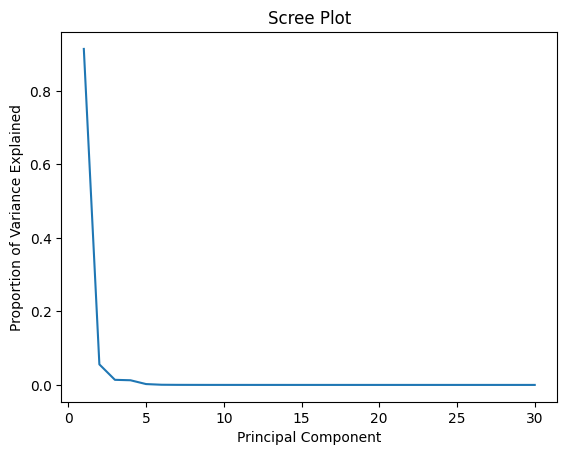

In [ ]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([9.14231729e-01, 5.59289454e-02, 1.38696787e-02, 1.26861224e-02,
       2.33726513e-03, 4.74712626e-04, 1.83713233e-04, 1.07622513e-04,
       5.22064763e-05, 4.15179586e-05, 3.19465518e-05, 1.54120163e-05,
       1.04394812e-05, 9.48943658e-06, 6.27642479e-06, 6.07173759e-06,
       3.35209458e-06, 2.03678902e-06, 1.05658349e-06, 1.87776049e-07,
       1.17175442e-07, 3.43274976e-08, 2.86693676e-08, 1.93069202e-08,
       1.20294246e-08, 6.35776017e-09, 7.14590657e-13, 9.01169330e-33,
       9.01169330e-33, 9.01169330e-33])

In [ ]:
pca_apply = PCA(n_components=15)
#Fit the model
pca_apply.fit(x_train)
x_train_pca = pca_apply.fit_transform(x_train)
x_test_pca = pca_apply.fit_transform(x_test)


In [ ]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(483463, 15)
(120866, 15)


In [ ]:
xgb_pca = XGBClassifier(n_estimators = 200)
#Fit the model
xgb_pca.fit(x_train_pca, y_train)
y_hat_train_xgb_pca = xgb_pca.predict(x_train_pca)
y_hat_test_xgb_pca = xgb_pca.predict(x_test_pca)

In [ ]:
model_eval(y_hat_train_xgb_pca,y_train)

The accuracy of the model is: 0.94
[[182460   8184]
 [ 20867 271952]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93    190644
           1       0.97      0.93      0.95    292819

    accuracy                           0.94    483463
   macro avg       0.93      0.94      0.94    483463
weighted avg       0.94      0.94      0.94    483463



In [ ]:
model_eval(y_hat_test_xgb_pca,y_test)

The accuracy of the model is: 0.93
[[45088  2536]
 [ 6129 67113]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     47624
           1       0.96      0.92      0.94     73242

    accuracy                           0.93    120866
   macro avg       0.92      0.93      0.93    120866
weighted avg       0.93      0.93      0.93    120866



In [ ]:
x_train_pca

array([[-2.96003063e+02,  4.32073538e+02,  4.19329295e+02, ...,
        -2.71338286e+00, -6.32875738e+00, -1.31634310e+00],
       [-2.39302729e+02, -9.55625303e+02, -1.37689924e+02, ...,
         3.11279526e+00,  7.00548694e+00, -4.18689755e+00],
       [-6.02172182e+00,  2.30945060e+02,  7.74411823e+02, ...,
         1.40577086e+01, -7.74121730e+00,  4.98208388e+00],
       ...,
       [-1.88152150e+02,  3.25281617e+02, -2.18991153e+02, ...,
        -1.50636540e+00, -5.95621019e+00, -4.54099248e+00],
       [-2.04313917e+02,  3.50706914e+02, -2.05821063e+02, ...,
         1.13395268e+01, -7.11529256e+00, -4.33166796e+00],
       [ 2.74071216e+02, -1.09716212e+03,  9.43924000e+01, ...,
         6.12702524e-01,  5.20624257e+00, -1.14592939e+00]])

In [ ]:
#Do the pca for the house prices dataset